In [1]:
%matplotlib inline

import sys
sys.path.append('..')

import xarray as xr
import numpy as np
from pathlib import Path
from itertools import product
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
def plot_map(ax, ds):
    proj = ccrs.PlateCarree()
    p = ds.sst[0].plot(ax=ax,
        transform=proj,
        subplot_kws={'projection': proj},
        levels=np.arange(0,1.5,0.1),
    )
    p.axes.coastlines()

In [3]:
data_dir = Path(os.getenv("OODIR"))

In [27]:
sampling_file = xr.open_dataset(data_dir / "IQUAM" / "OutputData" / "sampling_uncertainty.nc")
sampling_file2 = xr.open_dataset(data_dir / "IQUAM" / "OutputData" / "sampling_uncertainty_2021.nc")

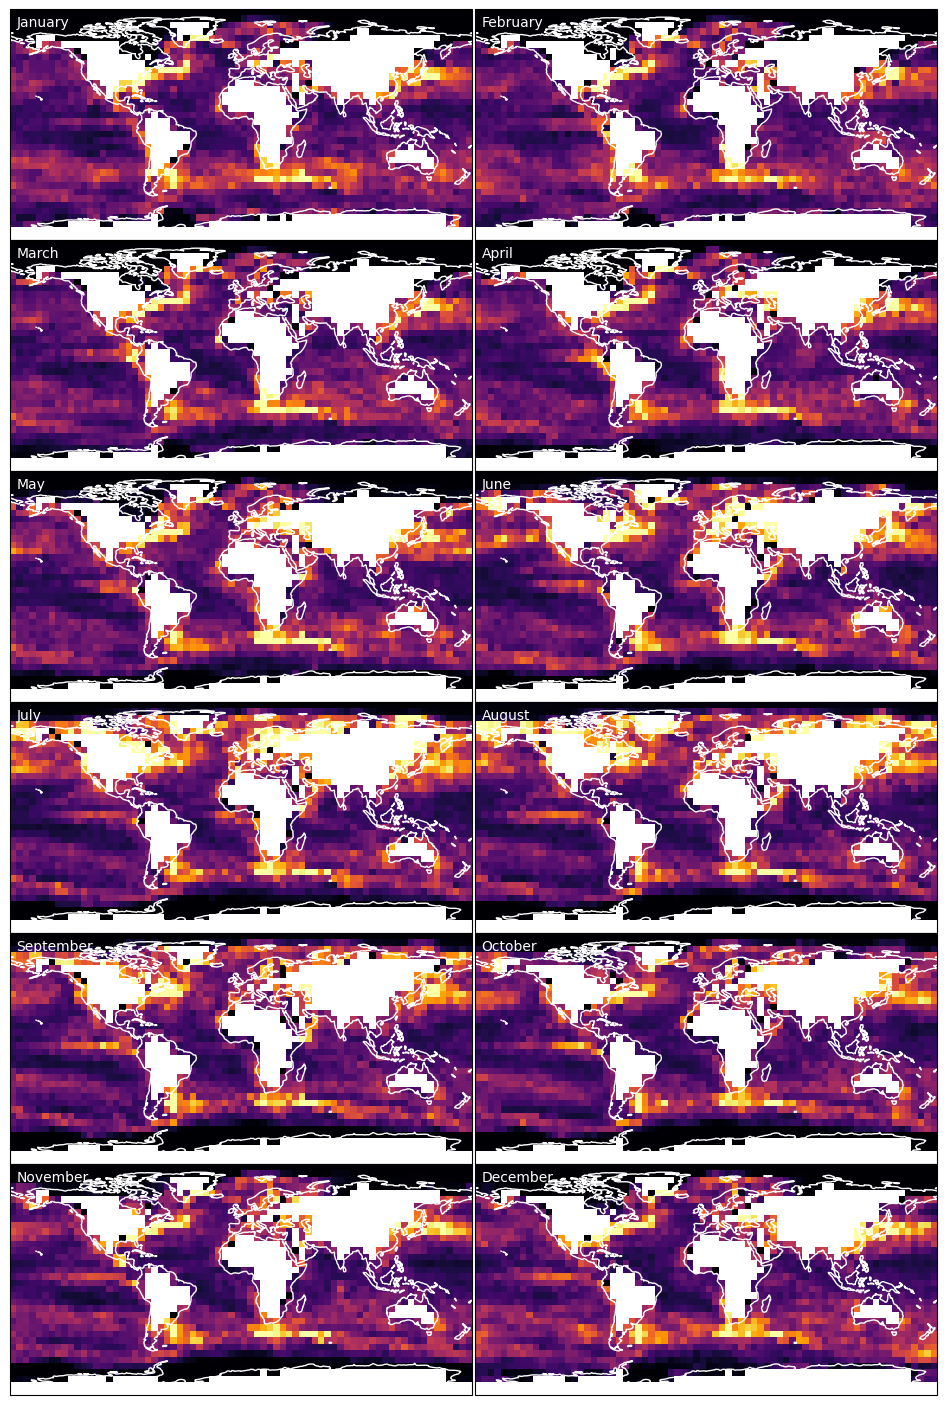

In [28]:
longitude = sampling_file.sst.longitude
latitude = sampling_file.sst.latitude
month= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,18), subplot_kw=dict(projection=ccrs.PlateCarree()))
plt.subplots_adjust(wspace=0, hspace=0)
for i, ax in zip(range(12), axes.ravel()):
    ax.coastlines(lw=1, color='w')
    x = ax.pcolormesh(longitude, latitude, sampling_file.sst[i], vmin=0.0, vmax=1.5, cmap='inferno')
    ax.text(-175, 77, month[i], color='white')

The sampling uncertainty estimated for each month is shown above. The process of calculating this is kind of long-winded. I use data from the ESA SST CCI L4 analysis, which is a satellite based products which is globally complete. It's insanely high resolution with grid cells that are 1/20 of a degree in latitude and longitude and daily. One of my 5x5xmonthly grid cells contains around 300,000 of these tiny grid cells (20 * 20 * 5 * 5 * 30). This is preposterous.

I loaded each day of data for one month in 2005 and randomly (and heavily) subsampled the fields. I keep 1/1000 of the data. That means I still have 300 satellite grid cells in one of my big grid cells. I calculate the full grid average and then randomly pick one observation from each grid cell, subtract the full grid cell average and calculate the standard deviation of these pseudo-anomalies. The standard deviation is then the estimated uncertainty associated with trying to represent a grid cell average with a single observation.

That's a rather roundabout way of calculating things, I'm aware. I started off doing things differently and the randomness made more sense. I wanted to write a gridded that allowed me to randomly subsample the available observations. This might come in handy later when trying to estimate uncertainties, because I can use various resampling techniques with actual observations. The nice thing about pandas is that you can apply user-defined functions to groups of observations very efficiently (it seems).

The value I get for the sampling uncertainty depends on the year I used. The plots below show the difference between sampling uncertainties estimated for two years (2005 and 2021). Some of this is just sampling - I am doing things randomly after all - but in some cases, there will be transient features that are inherently harder or easier to sample.

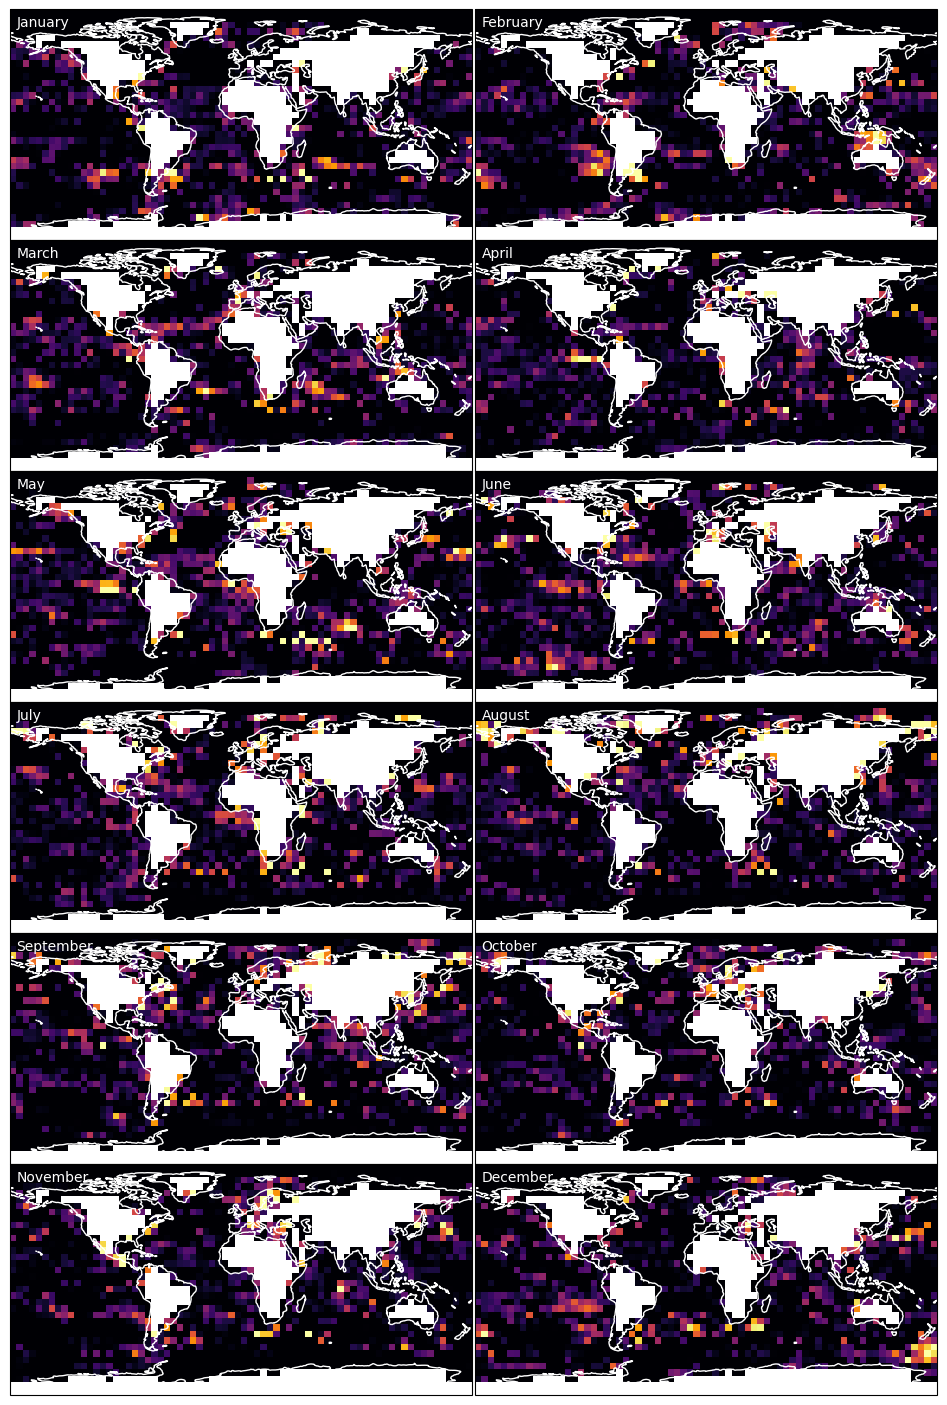

In [30]:
longitude = sampling_file.sst.longitude
latitude = sampling_file.sst.latitude
month= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,18), subplot_kw=dict(projection=ccrs.PlateCarree()))
plt.subplots_adjust(wspace=0, hspace=0)
for i, ax in zip(range(12), axes.ravel()):
    ax.coastlines(lw=1, color='w')
    x = ax.pcolormesh(longitude, latitude, sampling_file.sst[i]-sampling_file2.sst[i], vmin=0.0, vmax=0.5, cmap='inferno')
    ax.text(-175, 77, month[i], color='white')